# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 631


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?q={}&appid={}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url.format(city, weather_api_key)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        
        city_lng =city_weather["coord"]["lon"]
       
        city_max_temp = city_weather["main"]["temp_max"]-273.15
        
        city_humidity = city_weather["main"]["humidity"]
       
        city_clouds = city_weather["clouds"]["all"]
        
        city_wind = city_weather["wind"]["speed"]
        
        city_country = city_weather["sys"]["country"]
      
        city_date = city_weather["dt"]
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        print("Saving ", city)

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Saving  margaret river
Processing Record 2 of Set 1 | grytviken
Saving  grytviken
Processing Record 3 of Set 1 | anadyr
Saving  anadyr
Processing Record 4 of Set 1 | altay
Saving  altay
Processing Record 5 of Set 1 | punta arenas
Saving  punta arenas
Processing Record 6 of Set 1 | bredasdorp
Saving  bredasdorp
Processing Record 7 of Set 1 | bodaybo
Saving  bodaybo
Processing Record 8 of Set 1 | bethel
Saving  bethel
Processing Record 9 of Set 1 | port lincoln
Saving  port lincoln
Processing Record 10 of Set 1 | mandera
Saving  mandera
Processing Record 11 of Set 1 | laguna
Saving  laguna
Processing Record 12 of Set 1 | condega
Saving  condega
Processing Record 13 of Set 1 | nova sintra
Saving  nova sintra
Processing Record 14 of Set 1 | santa ana de yacuma
Saving  santa ana de yacuma
Processing Record 15 of Set 1 | olonkinbyen
Saving  olonkinbyen
Processing Record 16 of Set 1 | akj

In [4]:
# Convert the cities weather data into a Pandas DataFrame
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(data=city_data)

# Show Record Count
city_data_df.count()

City          606
Lat           606
Lng           606
Max Temp      606
Humidity      606
Cloudiness    606
Wind Speed    606
Country       606
Date          606
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,14.49,91,3,1.78,AU,1701192046
1,grytviken,-54.2811,-36.5092,1.29,73,9,3.96,GS,1701192046
2,anadyr,64.7500,177.4833,-3.72,85,75,11.00,RU,1701192047
3,altay,47.8667,88.1167,-2.46,52,1,4.30,CN,1701192047
4,punta arenas,-53.1500,-70.9167,13.01,47,40,15.43,CL,1701192032


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,14.49,91,3,1.78,AU,1701192046
1,grytviken,-54.2811,-36.5092,1.29,73,9,3.96,GS,1701192046
2,anadyr,64.7500,177.4833,-3.72,85,75,11.00,RU,1701192047
3,altay,47.8667,88.1167,-2.46,52,1,4.30,CN,1701192047
4,punta arenas,-53.1500,-70.9167,13.01,47,40,15.43,CL,1701192032


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

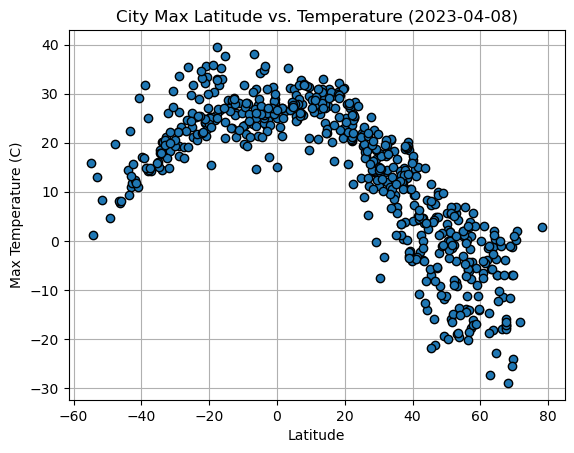

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure()
plt.plot(city_data_df["Lat"], city_data_df["Max Temp"], "o", mec="k")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-04-08)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

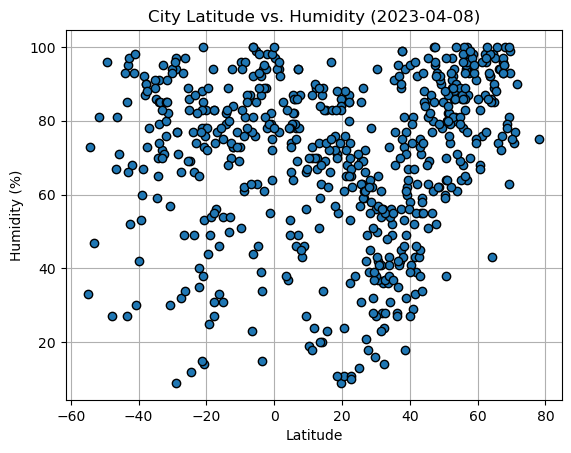

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure()
plt.plot(city_data_df["Lat"], city_data_df["Humidity"], "o", mec="k")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-04-08)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

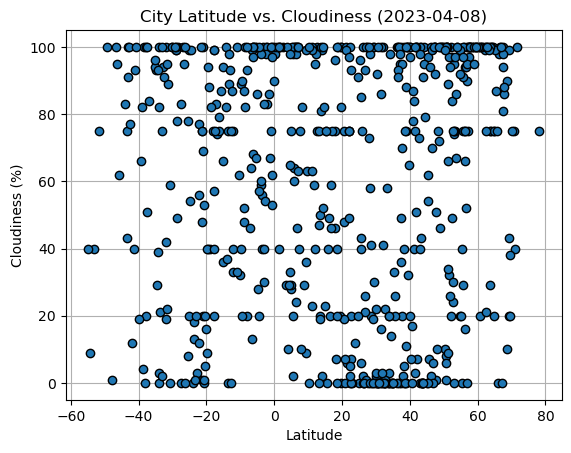

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure()
plt.plot(city_data_df["Lat"], city_data_df["Cloudiness"], "o", mec="k")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-04-08)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

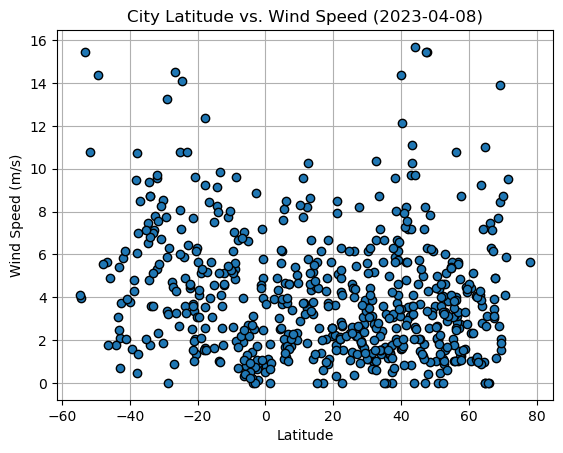

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure()
plt.plot(city_data_df["Lat"], city_data_df["Wind Speed"], "o", mec="k")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-04-08)")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# Define a function to create Linear Regression plots
def get_linregress(df, xcol, ycol): 
    x=df[xcol]
    y=df[ycol]
    result=linregress(x,y)
    slope=result.slope
    intercept=result.intercept
    
    r=result.rvalue
    print("The r-value is: ", r**2)
    plt.figure()
    plt.plot(x,y,"o")
    label= "y = {:.2f}x + {:.2f}".format(slope, intercept)
    plt.plot(x, slope *x + intercept , "r-", label=label)
    plt.legend(fontsize=12, loc= "best", framealpha=0.5)
    plt.xlabel(xcol)
    plt.ylabel(ycol)
    plt.show()
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,anadyr,64.7500,177.4833,-3.72,85,75,11.00,RU,1701192047
3,altay,47.8667,88.1167,-2.46,52,1,4.30,CN,1701192047
6,bodaybo,57.8506,114.1933,-16.22,99,100,1.28,RU,1701192047
7,bethel,41.3712,-73.4140,4.20,52,40,5.66,US,1701192048
9,mandera,3.9366,41.8670,31.11,37,10,3.02,KE,1701192048


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,14.49,91,3,1.78,AU,1701192046
1,grytviken,-54.2811,-36.5092,1.29,73,9,3.96,GS,1701192046
4,punta arenas,-53.1500,-70.9167,13.01,47,40,15.43,CL,1701192032
5,bredasdorp,-34.5322,20.0403,18.43,59,29,6.53,ZA,1701192047
8,port lincoln,-34.7333,135.8667,15.10,86,93,7.48,AU,1701192048


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:  0.758634882757865


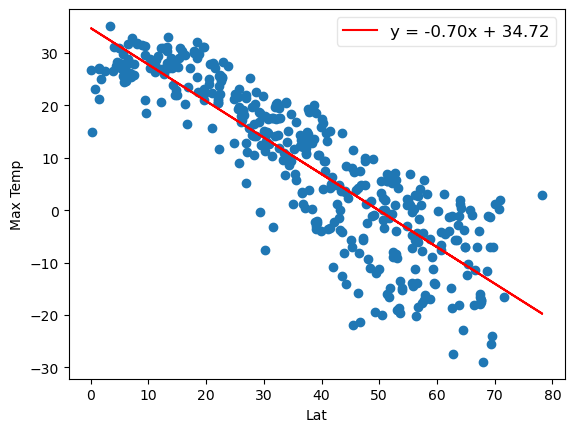

In [15]:
# Linear regression on Northern Hemisphere
get_linregress(northern_hemi_df, "Lat","Max Temp")

The r-value is:  0.40917240412228856


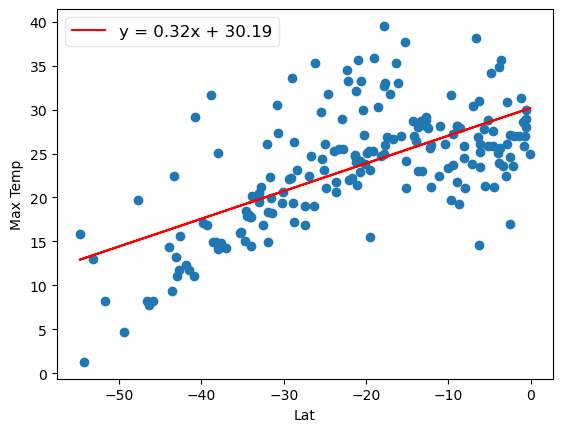

In [16]:
# Linear regression on Southern Hemisphere
get_linregress(southern_hemi_df, "Lat","Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is:  0.11598634802268493


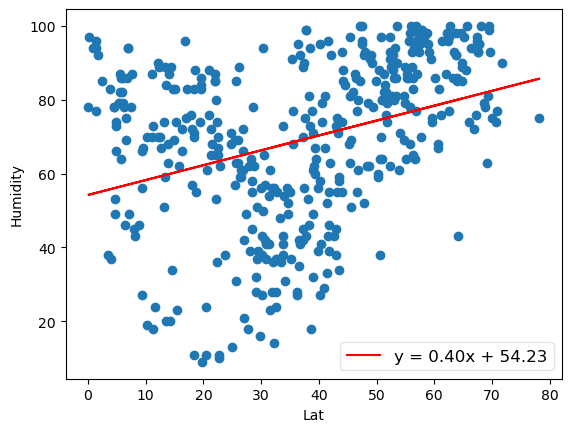

In [17]:
# Northern Hemisphere
get_linregress(northern_hemi_df, "Lat","Humidity")

The r-value is:  0.004527864726214099


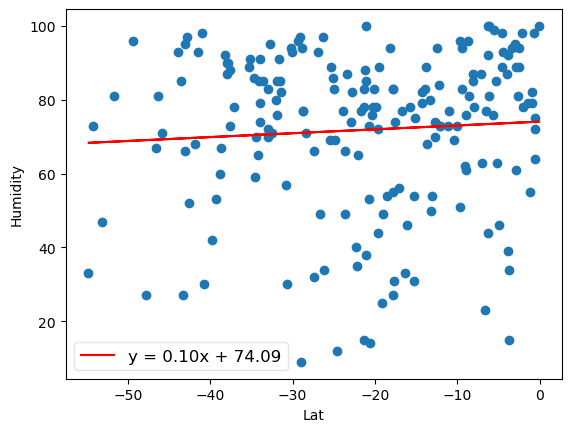

In [18]:
# Southern Hemisphere
get_linregress(southern_hemi_df, "Lat","Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:  0.025850474783644425


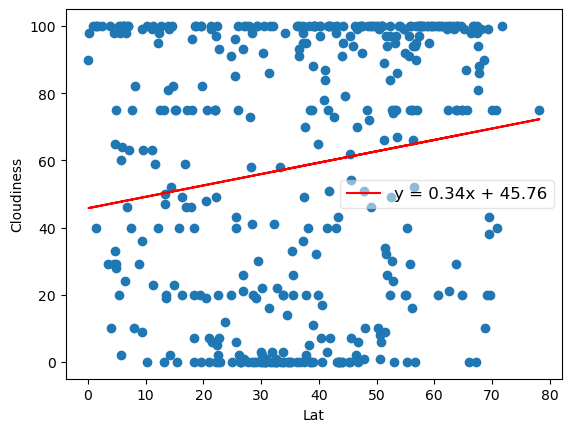

In [19]:
# Northern Hemisphere
get_linregress(northern_hemi_df, "Lat","Cloudiness")

The r-value is:  0.010220501231302715


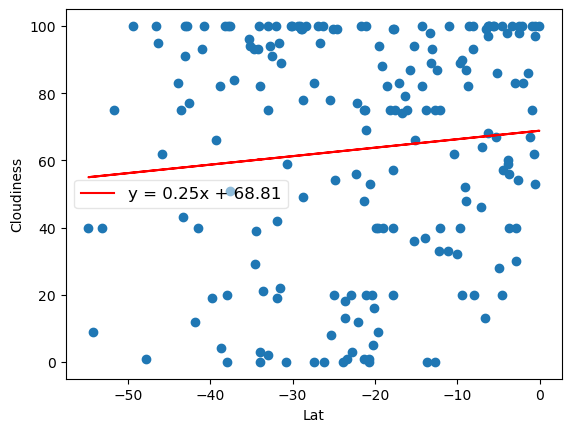

In [20]:
# Southern Hemisphere
get_linregress(southern_hemi_df, "Lat","Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:  0.0034415642993190347


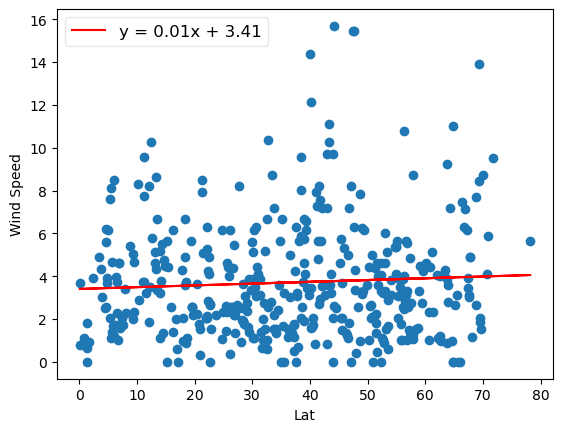

In [21]:
# Northern Hemisphere
get_linregress(northern_hemi_df, "Lat","Wind Speed")

The r-value is:  0.0937092289052531


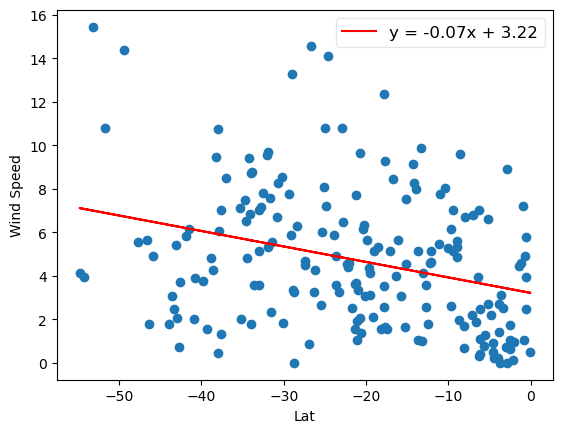

In [22]:
# Southern Hemisphere
get_linregress(southern_hemi_df, "Lat","Wind Speed")

There is no relationship between windspeed and latitude in both hemispheres